# CM50270 Reinforcement Learning
## Graded Assessment 2: Racetrack

In this assignment, you will implement and compare the performance of three reinforcement learning algorithms: On-Policy First-Visit Monte-Carlo Control, Sarsa, and Q-Learning.

**Total number of marks:** 40 marks.

**What to submit:** Your completed Jupyter notebook (.ipynb file) which should include **all** of your source code. Please **do not change the file name or compress/zip your submission**. Please do not include any identifying information on the files you submit. This coursework will be marked **anonymously**.

**Where to submit:** CM50270 Moodle Page.

You are required to **work individually**. You are welcome to discuss ideas with others but you must design your own implementation and **write your own code**.

**Do not plagiarise**. Plagiarism is a serious academic offence. For details on what plagiarism is and how to avoid it, please visit the following webpage: http://www.bath.ac.uk/library/help/infoguides/plagiarism.html

If you are asked to use specific variable names, data-types, function signatures and notebook cells, please **ensure that you follow these instructions**. Not doing so will cause the our marking software to reject your work, and will assign you a score of zero for that question. Please **do not duplicate or delete existing cells**: if you need additional cells, please insert new ones. **If our marking software rejects your work because you have not followed our instructions, you may not get any credit for your work**.

Please **do not use any non-standard, third-party libraries** apart from numpy and matplotlib. In this assignment, you should also use the `racetrack_env.py` file, which we have provided for you. **If we are unable to run your code because you have used unsupported external libraries, you may not get any credit for your work.**

Please remember to **save your work regularly**.

Please be sure to **restart the kernel and run your code from start-to-finish** (Kernel → Restart & Run All) before submitting your notebook. Otherwise, you may not be aware that you are using variables in memory that you have deleted.

Your total runtime must be less than **10 minutes** on the University's lab computers, and **written answer length limits** must be adhered to. Otherwise, you may not get credit for your work.

## The Racetrack Environment
We have implemented a custom environment called "Racetrack" for you to use during this piece of coursework. It is inspired by the environment described in the course textbook (Reinforcement Learning, Sutton & Barto, 2018, Exercise 5.12), but is not exactly the same.

### Environment Description
Consider driving a race car around a turn on a racetrack. In order to complete the race as quickly as possible, you would want to drive as fast as you can but, to avoid running off the track, you must slow down while turning.

In our simplified racetrack environment, the agent is at one of a discrete set of grid positions. The agent also has a discrete speed in two directions, $x$ and $y$. So the state is represented as follows:
$$(\text{position}_y, \text{position}_x, \text{velocity}_y, \text{velocity}_x)$$

The agent collects a reward of -1 at each time step, an additional -10 for leaving the track (i.e., ending up on a black grid square in the figure below), and an additional +10 for reaching the finish line (any of the red grid squares). The agent starts each episode on a randomly selected grid-square on the starting line (green grid squares) with a speed of zero in both directions. At each time step, the agent can change its speed in both directions. Each speed can be changed by +1, -1 or 0, giving a total of nine actions. For example, the agent may increase its speed in the $x$ direction by -1 and its speed in the $y$ direction by +1. The agent's speed cannot be greater than +10 or less than -10 in either direction.

<img src="images/track_big.png" style="width: 600px;"/>


The agent's next state is determined by its current grid square, its current speed in two directions, and the changes it  makes to its speed in the two directions. This environment is stochastic. When the agent tries to change its speed, no change occurs (in either direction) with probability 0.2. In other words, 20% of the time, the agent's action is ignored and the car's speed remains the same in both directions.

If the agent leaves the track, it is returned to a random start grid-square and has its speed set to zero in both directions; the episode continues. An episode ends only when the agent transitions to a goal grid-square.



### Environment Implementation
We have implemented the above environment in the `racetrack_env.py` file, for you to use in this coursework. Please use this implementation instead of writing your own, and please do not modify the environment.

We provide a `RacetrackEnv` class for your agents to interact with. The class has the following methods:
- **`reset()`** - this method initialises the environment, chooses a random starting state, and returns it. This method should be called before the start of every episode.
- **`step(action)`** - this method takes an integer action (more on this later), and executes one time-step in the environment. It returns a tuple containing the next state, the reward collected, and whether the next state is a terminal state.
- **`render(sleep_time)`** - this method renders a matplotlib graph representing the environment. It takes an optional float parameter giving the number of seconds to display each time-step. This method is useful for testing and debugging, but should not be used during training since it is *very* slow. **Do not use this method in your final submission**.
- **`get_actions()`** - a simple method that returns the available actions in the current state. Always returns a list containing integers in the range [0-8] (more on this later).

In our code, states are represented as Python tuples - specifically a tuple of four integers. For example, if the agent is in a grid square with coordinates ($Y = 2$, $X = 3$), and is moving zero cells vertically and one cell horizontally per time-step, the state is represented as `(2, 3, 0, 1)`. Tuples of this kind will be returned by the `reset()` and `step(action)` methods. It is worth noting that tuples can be used to index certain Python data-structures, such as dictionaries.

There are nine actions available to the agent in each state, as described above. However, to simplify your code, we have represented each of the nine actions as an integer in the range [0-8]. The table below shows the index of each action, along with the corresponding changes it will cause to the agent's speed in each direction.

<img src="images/action_grid.png" style="width: 250px;"/>

For example, taking action 8 will increase the agent's speed in the $x$ direction, but decrease its speed in the $y$ direction.

### Racetrack Code Example
Below, we go through a quick example of using the `RaceTrackEnv` class.

First, we import the class, then create a `RaceTrackEnv` object called `env`. We then initialise the environment using the `reset()` method, and take a look at the initial state variable and the result of `plot()`.


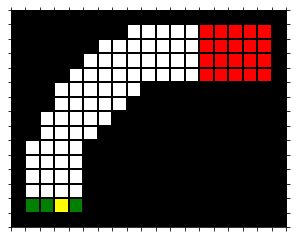

Initial State: (1, 3, 0, 0)


In [1]:
%matplotlib inline

# Set random seed to make example reproducable.
import numpy as np
import random
seed = 5
random.seed(seed)
np.random.seed(seed)

from racetrack_env import RacetrackEnv

# Instantiate environment object.
env = RacetrackEnv()

# Initialise/reset environment.
state = env.reset()
env.render()
print("Initial State: {}".format(state))

As you can see, `reset()` has returned a valid initial state as a four-tuple. The function `plot()` uses the same colour-scheme as described above, but also includes a yellow grid-square to indicate the current position of the agent.

Let's make the agent go upward by using `step(1)`, then inspect the result (recall that action `1` increments the agent's vertical speed while leaving the agent's horizontal speed unchanged).

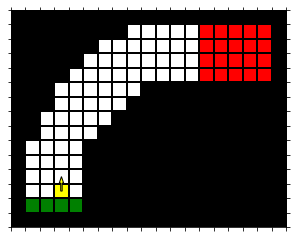

Next State: (2, 3, 1, 0), Reward: -1, Terminal: False


In [2]:
# Let us increase the agent's vertical speed (action 1).
next_state, reward, terminal = env.step(1)
env.render()
print("Next State: {}, Reward: {}, Terminal: {}".format(next_state, reward, terminal))

You can see that the agent has moved one square upwards, and now has a positive vertical speed (indicated by the yellow arrow). Let's set up a loop to see what happens if we take the action a few more times, causing it to repeatedly leave the track.

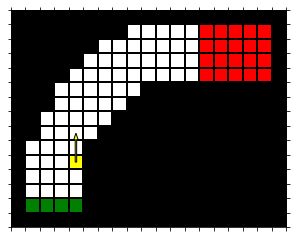

In [3]:
num_steps = 50
for t in range(num_steps) :
    next_state, reward, terminal = env.step(1)
    env.render()

## Exercise 1: On-Policy MC Control (6 Marks)

In this exercise, you will implement an agent which learns to reach a goal state in the racetrack task using On-Policy First-Visit MC Control, the pseudocode for which is reproduced below (Reinforcement Learning, Sutton & Barto, 2018, Section 5.4 p.101).

<img src="images/mc_control_algo.png" style="width: 650px;"/>

Please use the following parameter settings:
- Discount factor $\gamma = 0.9$.
- For your $\epsilon$-greedy policy, use exploratory action probability $\epsilon = 0.15$.
- Number of training episodes $= 150$.
- Number of agents averaged should be at **least** 20.

**If you use incorrect parameters, you may not get any credit for your work.**

Your implementation of a tabular **On-Policy First-Visit MC Control** agent should produce a list named `mc_rewards`. This list should contain one list for each agent that you train. Each sub-list should contain the undiscounted sum of rewards earned during each episode by the corresponding agent. <br />
For example, if you train $20$ agents, your `mc_rewards` list will contain $20$ sub-lists, each containing $150$ integers. This list will be used to plot an average learning curve, which will be used to mark your work.

In [4]:
# Please write your code for Exercise 1 in this cell or in as many cells as you want ABOVE this cell.
# You should implement your MC agent and plot your average learning curve here.
# Do NOT delete this cell.

# YOUR CODE HERE
discount_factor = 0.9
epsilon = 0.15
num_ep = 150
num_agent = 20

def initialise(env):
    # State
    num_y = env.track.shape[0]
    num_x = env.track.shape[1]
    states = [(y_pos, x_pos, y_vel, x_vel) for y_pos in range(num_y) for x_pos in range(num_x) for y_vel in range(-10,11) for x_vel in range(-10,11)]
    state_size = len(states)

    # Action
    actions = list(env.ACTIONS_DICT.keys())
    action_size = len(actions)

    Q_value = np.zeros((state_size, action_size))
    
    Q = dict(zip(states, Q_value))
    Returns = {}
    for state in states:
        Returns[state] = {}
        for action in actions:
            Returns[state][action] = []
    return Q, Returns, states, actions

def epsilon_greedy(Q, epsilon, state, actions):
    if random.uniform(0,1) < epsilon:
        return np.random.choice(actions)
    else:
        return np.random.choice(np.arange(9)[Q[state] == np.max(Q[state])])
    
def generate_episode(env, Q, epsilon, actions):
    episode = []
    state = env.reset()
    while True:
        action = epsilon_greedy(Q, epsilon, state, actions)
        next_state, reward, terminal = env.step(action)
        episode.append((state, action, reward))
        if terminal:
            break
        else:
            state = next_state
    return episode

def on_policy_mc_control(discount_factor, epsilon, num_ep, env):
    # Initialise
    Q, Returns, states, actions = initialise(env)
    # For plotting
    sum_undiscounted_reward_list = []    
    # For each episode
    for ep in range(num_ep):
        # Generate ep following policy --> (state, action, reward)
        episode = generate_episode(env, Q, epsilon, actions)
        # Sum discount return
        G = 0.0
        all_state_action = [(s,a) for (s,a,r) in episode]
        rewards = [r for (s,a,r) in episode]
        # For plotting
        sum_undiscounted_reward_list.append(np.sum(rewards))
        # Loop each step in ep, backwards
        for t in range(len(episode))[::-1]:
            state, action, reward = episode[t]
            G = (discount_factor * G) + reward
            # If the pair St, At doesnt appear in state-action pairs = first-visit
            if not (state, action) in all_state_action[0:t]:
                # Append G to Returns
                Returns[state][action].append(G)
                # Update Q with avg Returns
                Q[state][action] = np.average(Returns[state][action])
                        
    return Q, Returns, sum_undiscounted_reward_list

# Train 20 agents
mc_rewards = []
for agent in range(num_agent):
    Q, Returns, sum_undiscounted_reward_list = on_policy_mc_control(discount_factor, epsilon, num_ep, env)
    mc_rewards.append(sum_undiscounted_reward_list)

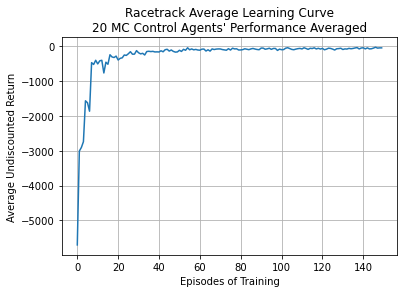

In [5]:
from racetrack_env import plot_results
from racetrack_env import simple_issue_checking

# Checking MC Control Results for Obvious Issues.
simple_issue_checking(mc_rewards)

# Plotting MC Control Learning Curve.
%matplotlib inline
plot_results(mc_rewards = mc_rewards)

## Exercise 2: Sarsa (3 Marks)

In this exercise, you will implement an agent which learns to reach a goal state in the racetrack task using the Sarsa algorithm, the pseudocode for which is reproduced below (Reinforcement Learning, Sutton & Barto, 2018, Section 6.4 p.129).

<img src="images/sarsa_algo.png" style="width: 650px;"/>

Please use the following parameter settings:
- Step size parameter $\alpha = 0.2$.
- Discount factor $\gamma = 0.9$.
- For your $\epsilon$-greedy policy, use exploratory action probability $\epsilon = 0.15$.
- Number of training episodes $= 150$.
- Number of agents averaged should be at **least** 20.

**If you use incorrect parameters, you may not get any credit for your work.**

Your implementation of a tabular **Sarsa** agent should produce a list named `sarsa_rewards`. This list should contain one list for each agent that you train. Each sub-list should contain the undiscounted sum of rewards earned during each episode by the corresponding agent. <br />
For example, if you train $20$ agents, your `sarsa_rewards` list will contain $20$ sub-lists, each containing $150$ integers. This list will be used to plot an average learning curve, which will be used to mark your work.

In [6]:
# Please write your code for Exercise 2 in this cell or in as many cells as you want ABOVE this cell.
# You should implement your sarsa agent and plot your average learning curve here.
# Do NOT delete this cell.

# YOUR CODE HERE
step_size = 0.2
    
def sarsa(step_size, discount_factor, epsilon, num_ep, env):
    # Initialise Q
    Q = initialise(env)[0]
    actions = initialise(env)[3]
    # For plotting
    sum_undiscounted_reward_list = []
    # For each episode
    for ep in range(num_ep):
        # Initialise S
        state = env.reset()
        # Choose A from S using epsilon_greedy_policy
        action = epsilon_greedy(Q, epsilon, state, actions)
        # For plotting
        sum_undiscounted_reward = 0
        # For each timestep
        while True:
            # Take action A, observe R and S'
            next_state, reward, terminal = env.step(action)
            # For plotting
            sum_undiscounted_reward += reward
            # Choose A' from S' using epsilon_greedy_policy
            next_action = epsilon_greedy(Q, epsilon, next_state, actions)
            # Update Q(S,A)
            Q[state][action] += step_size*(reward + (discount_factor*Q[next_state][next_action]) - Q[state][action])
            # Update S and A
            state = next_state
            action = next_action
            # Loop until S is terminal
            if terminal:
                break
        sum_undiscounted_reward_list.append(sum_undiscounted_reward)
    return Q, sum_undiscounted_reward_list

# Train 20 agents
sarsa_rewards = []
for agent in range(num_agent):
    Q, sum_undiscounted_reward_list = sarsa(step_size, discount_factor, epsilon, num_ep, env)
    sarsa_rewards.append(sum_undiscounted_reward_list)

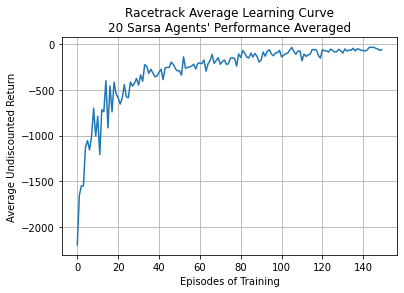

In [7]:
from racetrack_env import plot_results
from racetrack_env import simple_issue_checking

# Checking Sarsa Results for Obvious Issues.
simple_issue_checking(sarsa_rewards)

# Plotting Sarsa Learning Curve.
%matplotlib inline
plot_results(sarsa_rewards = sarsa_rewards)

## Exercise 3: Q-Learning (3 Marks)

In this exercise, you will implement an agent which learns to reach a goal state in the racetrack task using the Q-Learning algorithm, the pseudocode for which is reproduced below (Reinforcement Learning, Sutton & Barto, 2018, Section 6.5 p.131).

<img src="images/q_learning_algo.png" style="width: 650px;"/>

Please use the following parameter settings:
- Step size parameter $\alpha = 0.2$.
- Discount factor $\gamma = 0.9$.
- For your $\epsilon$-greedy policy, use exploratory action probability $\epsilon = 0.15$.
- Number of training episodes $= 150$.
- Number of agents averaged should be at **least** 20.

**If you use incorrect parameters, you may not get any credit for your work.**

Your implementation of a tabular **Q-Learning** agent should produce a list named `q_learning_rewards`. This list should contain one list for each agent that you train. Each sub-list should contain the undiscounted sum of rewards earned during each episode by the corresponding agent. <br />
For example, if you train $20$ agents, your `q_learning_rewards` list will contain $20$ sub-lists, each containing $150$ integers. This list will be used to plot an average learning curve, which will be used to mark your work.

Hint: Your Q-Learning implementation is likely to be similar to your Sarsa implementation. Think hard about where these two algorithms differ.

In [8]:
# Please write your code for Exercise 3 in this cell or in as many cells as you want ABOVE this cell.
# You should implement your q-learning agent agent and plot your average learning curve here.
# Do NOT delete this cell.

# YOUR CODE HERE

def q_learning(step_size, discount_factor, epsilon, num_ep, env):
    # Initialise Q
    Q = initialise(env)[0]
    actions = initialise(env)[3]
    # For plotting
    sum_undiscounted_reward_list = []
    # For each episode
    for ep in range(num_ep):
        # Initialise S
        state = env.reset()
        # For plotting
        sum_undiscounted_reward = 0
        # For each timestep
        while True:
            # Choose A from S using epsilon_greedy_policy
            action = epsilon_greedy(Q, epsilon, state, actions)
            # Take action A, observe R and S'
            next_state, reward, terminal = env.step(action)
            # For plotting
            sum_undiscounted_reward += reward
            # Update Q(S,A)
            Q[state][action] += step_size*(reward + (discount_factor * np.max(Q[next_state])) - Q[state][action])
            # Update S and A
            state = next_state
            # Loop until S is terminal
            if terminal:
                break
        sum_undiscounted_reward_list.append(sum_undiscounted_reward)
    return Q, sum_undiscounted_reward_list

# Train 20 agents
q_learning_rewards = []
for agent in range(num_agent):
    Q, sum_undiscounted_reward_list = q_learning(step_size, discount_factor, epsilon, num_ep, env)
    q_learning_rewards.append(sum_undiscounted_reward_list)

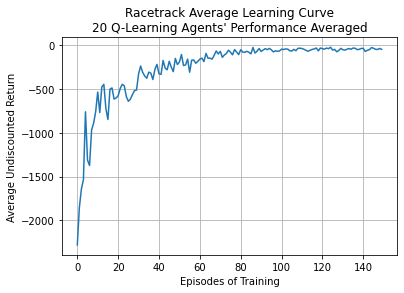

In [9]:
from racetrack_env import plot_results
from racetrack_env import simple_issue_checking

# Checking Q-Learning Results for Obvious Issues.
simple_issue_checking(q_learning_rewards)

# Plotting Q-Learning Learning Curve.
%matplotlib inline
plot_results(q_learning_rewards = q_learning_rewards)

## Exercise 4: Comparison & Discussion (10 Marks)

Below, we have used your results to plot your three previous learning curves on the same set of axes. <br />
A cropped version of this learning curve has also been plotted, to make it easier to compare the performance of your agents towards the end of training.

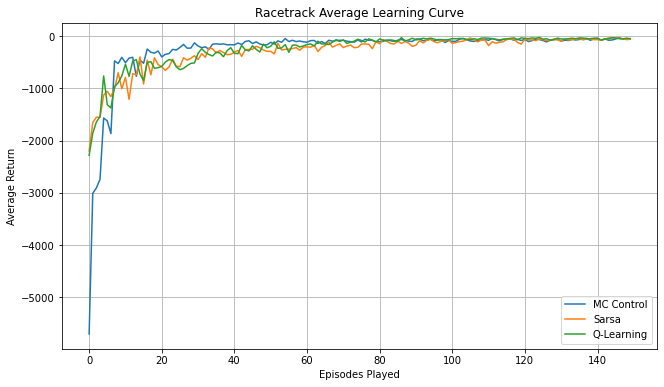

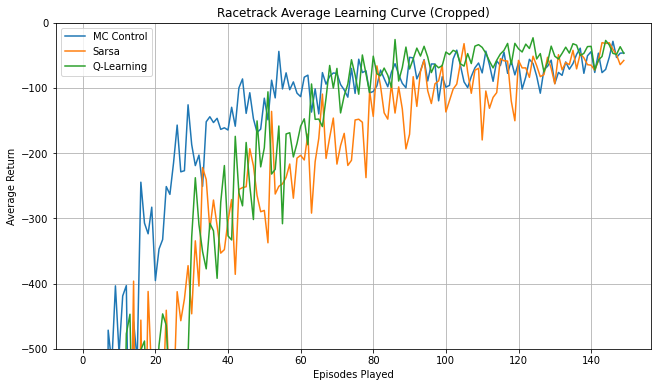

In [10]:
from racetrack_env import plot_combined_results

# Plotting Combined Learning Curve.
%matplotlib inline
plot_combined_results(mc_rewards, sarsa_rewards, q_learning_rewards)

Based on your results, and your understanding of the algorithms that you have implemented, please answer the following discussion questions. <br />
Please do not exceed **two sentences** for any of your answers.

**Question 1:** Briefly compare the performance of each of your agents.

**Question 2:** Why do you think that your Monte Carlo and Temporal-Difference agents behaved differently?

**Question 3:** Does the performance of your Sarsa and Q-Learning agents meet your expectations? Why do you think that this was the case?

**Question 4:** What could be done to improve the performance of your agents?

Please write your answers for Exercise 4 in this markdown cell.

**Answer 1:** In terms of the learning rate for the first sixty episodes, the Monte Carlo agent performs better than the Temporal-Difference agents as it starts with a much lower average return. Regarding the average return of the last few episodes, the Q-learning agent is doing slightly better than Monte Carlo and Sarsa agents that give a similar average return.



**Answer 2:** The Monte Carlo agent has to wait till the end of the episode to collect the rewards and calculate the maximum expected future reward, while the Temporal Difference agent does not have to wait until the end of the episode to update as it estimates the rewards each step. As a result of bootstrapping and sampling, the Temporal Difference agents begin with a much higher average return.



**Answer 3:** Yes, the Q-learning agent is expected to perform slightly better for giving the higher average return. This is because the property of off-policy allows the Q-learning agent to learn optimal policy choosing the optimal path that provides less risk of negative reward than the Sarsa agent that allows all possible penalties from a 15% chance of exploratory moves.


**Answer 4:** For the Monte Carlo agent, run more episodes, and the average return will reach a higher value as it learns from the complete episodes. For Temporal-Difference agents. For the Temporal Difference agents, considering a change from one-step to n-step TD would be able to improve the average return as it could do both bootstrapping and look more than one step ahead.


## Exercise 5: Modified Q-Learning Agent (18 Marks)
### Exercise 5a: Implementation
In this exercise, you must implement a Temporal-Difference learning agent which learns to reach a goal state in the racetrack more efficiently than your previous Q-Learning agent. You may base your implementation on Q-Learning (Reinforcement Learning, Sutton & Barto, 2018, Section 6.5 p.131), the pseudocode for which is reproduced below, but you may also base your implementation on Sarsa if you wish.

<img src="images/q_learning_algo.png" style="width: 650px;"/>

In order to score high marks in this exercise, you will need to extend your solution beyond a simple Q-Learning or Sarsa agent to achieve higher performance and/or more efficient learning (i.e. using fewer interactions with the environment). Ideas for improving your agent will have been discussed in the unit, and can be found in the course textbook (Reinforcement Learning, Sutton & Barto, 2018). However you go about improving your agent, it must still use a **tabular** Temporal-Difference learning method at its core.

Please use the following parameter settings:
- Number of training episodes $= 150$.
- Number of agents averaged should be at **least** 2.

**If you use incorrect parameters, you may not get any credit for your work.**

You may adjust all other parameters as you see fit.


Your implementation of a tabular modified Temporal-Difference learning agent should produce a list named `modified_agent_rewards`. This list should contain one list for each agent that you train. Each sub-list should contain the undiscounted sum of rewards earned during each episode by the corresponding agent. <br />
For example, if you train $20$ agents, your `modified_agent_rewards` list will contain $20$ sub-lists, each containing $150$ integers. This list will be used to plot an average learning curve, which will be used to mark your work.


In [11]:
### Please write your code for Exercise 5a in this cell or in as many cells as you want ABOVE this cell.
# You should implement your modified q-learning agent agent and plot your average learning curve here.
# Do NOT delete this cell.

# YOUR CODE HERE
n_step = 3

def n_step_sarsa(n, step_size, discount_factor, epsilon, num_ep, env):
    # Initialise Q
    Q = initialise(env)[0]
    actions = initialise(env)[3]
    # For plotting
    sum_undiscounted_reward_list = []
    # For each episode
    for ep in range(num_ep):
        # Initialise S
        state = env.reset()
        # Choose A from S using epsilon_greedy_policy
        action = epsilon_greedy(Q, epsilon, state, actions)
        # Store states, actions, and rewards
        states_ep = [state]
        actions_ep = [action]
        rewards_ep = [0]
        # Initilise the timestamp the agent currently at starting from 0,1,2... until the end of the game
        t = 0
        # Initialise T to infinity and later update the end state
        T = np.inf
        # For plotting
        sum_undiscounted_reward = 0
        # For each timestep
        while True:
            if t < T:
                # Take action A, observe R and S'
                next_state, reward, terminal = env.step(action)
                # For plotting
                sum_undiscounted_reward += reward
                # If next state is terminal then update T, else update action action according to next state
                states_ep.append(next_state)
                rewards_ep.append(reward)
                if terminal:
                    T = t + 1
                else:
                    # Choose A' from S' using policy derived from Q
                    action = epsilon_greedy(Q, epsilon, next_state, actions)
                    actions_ep.append(action)
            # Update tau, the timestamp of Q value that being updated (according to n-step)
            tau = t - n + 1
            
            if tau >= 0:
                # Update return G
                G = 0
                for i in range(tau+1, min(tau + n, T)+1):
                    G += np.power(discount_factor, (i - tau - 1)) * rewards_ep[i]
                if (tau + n) < T:
                    # State and Action at time step tau + n
                    state_tpn = states_ep[tau + n]
                    action_tpn = actions_ep[tau + n]
                    G += np.power(discount_factor, n) * Q[state_tpn][action_tpn]
                # Update for the tau timestep
                # State and Time at time step tau
                state_tau = states_ep[tau]
                action_tau = actions_ep[tau]
                Q[state_tau][action_tau] += step_size * (G -  Q[state_tau][action_tau])
            
            # Terminate
            if tau == T-1:
                break
            
            t += 1
        sum_undiscounted_reward_list.append(sum_undiscounted_reward)


    return Q, sum_undiscounted_reward_list

modified_agent_rewards = []
for agent in range(num_agent):
    Q, sum_undiscounted_reward_list = n_step_sarsa(n_step, step_size, discount_factor, epsilon, num_ep, env)
    modified_agent_rewards.append(sum_undiscounted_reward_list)

### Exercise 5b: Comparison & Discussion

Below, we have used your results to plot a the performance of your modified agent and your previous Q-Learning agent on the same set of axes. <br />
A cropped version of this learning curve has also been plotted, to make it easier to compare the performance of your agents towards the end of training.

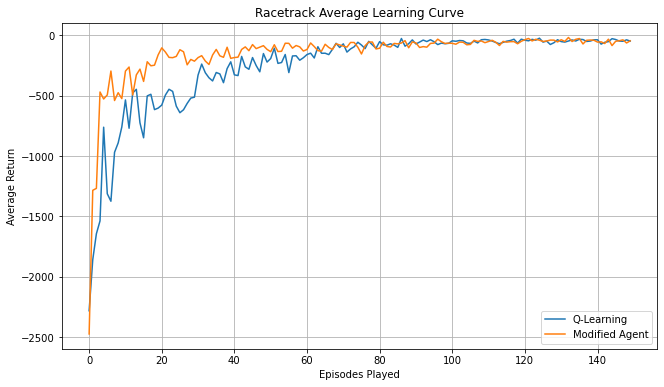

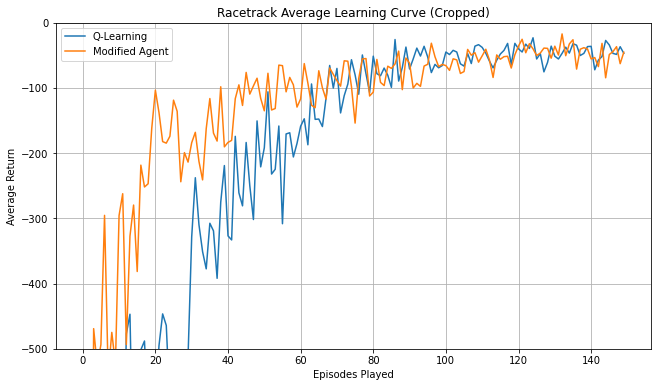

In [12]:
from racetrack_env import plot_modified_agent_results
from racetrack_env import simple_issue_checking

# Checking Modified Agent Results for Obvious Issues.
simple_issue_checking(modified_agent_rewards, modified_agent = True)

# Plotting Modified Agent Learning Curve.
%matplotlib inline
plot_modified_agent_results(q_learning_rewards, modified_agent_rewards)

Based on your results, and your understanding of the algorithm and modifications that you have implemented, please answer the following discussion questions. <br />
Please do not exceed **two sentences** for any of your answers.

**Question 1:** What modifications did you make to your agent?

**Question 2:** What effect(s) did you expect your modifications to have on the performance of your agent?

**Question 3:** Did your modifications have the effect(s) you expected? Why do you think that this was the case?

**Question 4:** If you had more time, what would you do to further improve the performance of your agent?

Please note that **your implementation and discussion will be assessed jointly**. This means that, in order to score highly, you will need to correctly implement appropriate modifications to your agent **AND** discuss them well.

Please write your answers for Exercise 5b in this markdown cell.

**Answer 1:** Based on the Sarsa agent that follows the one-step update method, the modification to n-step is made to achieve higher performance regarding the learning rate. Actions, states, and rewards are initialised at the beginning of each episode to keep track of the agent’s behaviour and perform the n-step updates. 


**Answer 2:** The n-step method should provide a faster propagation of the reward than the one-step method. It should also reach a similar value to the average return of the Q-learning agent in the end. 



**Answer 3:** Yes, the modified one is expected to learn faster in the first few episodes. This is because using the right n-step to bootstrap will produce minor errors resulting in the more quickly converging to the maximum average return.


**Answer 4:** I would try to implement the agent following the Sarsa(λ) method as the curse of the timestep in n-step bootstrapping still exist. Sarsa(λ) has no waiting time until the nth step as it combines multiple n-steps into a single update. 

In [13]:
# Further implementation

trace_decay = 0.9

def sarsa_lambda(step_size, discount_factor, trace_decay, epsilon, num_ep, env):
    # Initialise Q and eligibility trace
    Q = initialise(env)[0]
    states = initialise(env)[2]
    actions = initialise(env)[3]

    # For plotting
    sum_undiscounted_reward_list = []
    # For each episode
    for ep in range(num_ep):
        # Initialise S
        state = env.reset()
        e = initialise(env)[1]
        # Choose A from S using epsilon_greedy_policy??
        action = epsilon_greedy(Q, epsilon, state, actions)
        # For plotting
        sum_undiscounted_reward = 0
        # For each timestep
        while True:
            # Take action A, observe R and S'
            next_state, reward, terminal = env.step(action)        
            # For plotting
            sum_undiscounted_reward += reward
            # Choose A' from S' using epsilon_greedy_policy
            next_action = epsilon_greedy(Q, epsilon, next_state, actions)
            # Update delta for diff btw target and current estimate 
            delta = reward + (discount_factor*Q[next_state][next_action]) - Q[state][action]
            # Update eligibility
            e[state][action] += 1
            # Update every state in every timestep according t eligibility
            for s, _ in Q.items():
                Q[s][:] += step_size*delta*e[s][:]
                e[s][:] *= discount_factor*trace_decay
            # Loop until S is terminal
            if terminal:
                break
            # Update S and A
            state = next_state
            action = next_action
        sum_undiscounted_reward_list.append(sum_undiscounted_reward)
    return Q, sum_undiscounted_reward_list